# Tugas Praktikum

## Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import hdbscan

## Memuat dataset Iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

# Menampilkan sedikit informasi dataset
print("Shape data:", X.shape)
print("Jumlah label unik:", len(np.unique(y)))

Shape data: (150, 4)
Jumlah label unik: 3


## Melakukan klasterisasi HDBSCAN

In [ ]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

c:\Users\natha\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\natha\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\natha\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\natha\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\natha\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\n

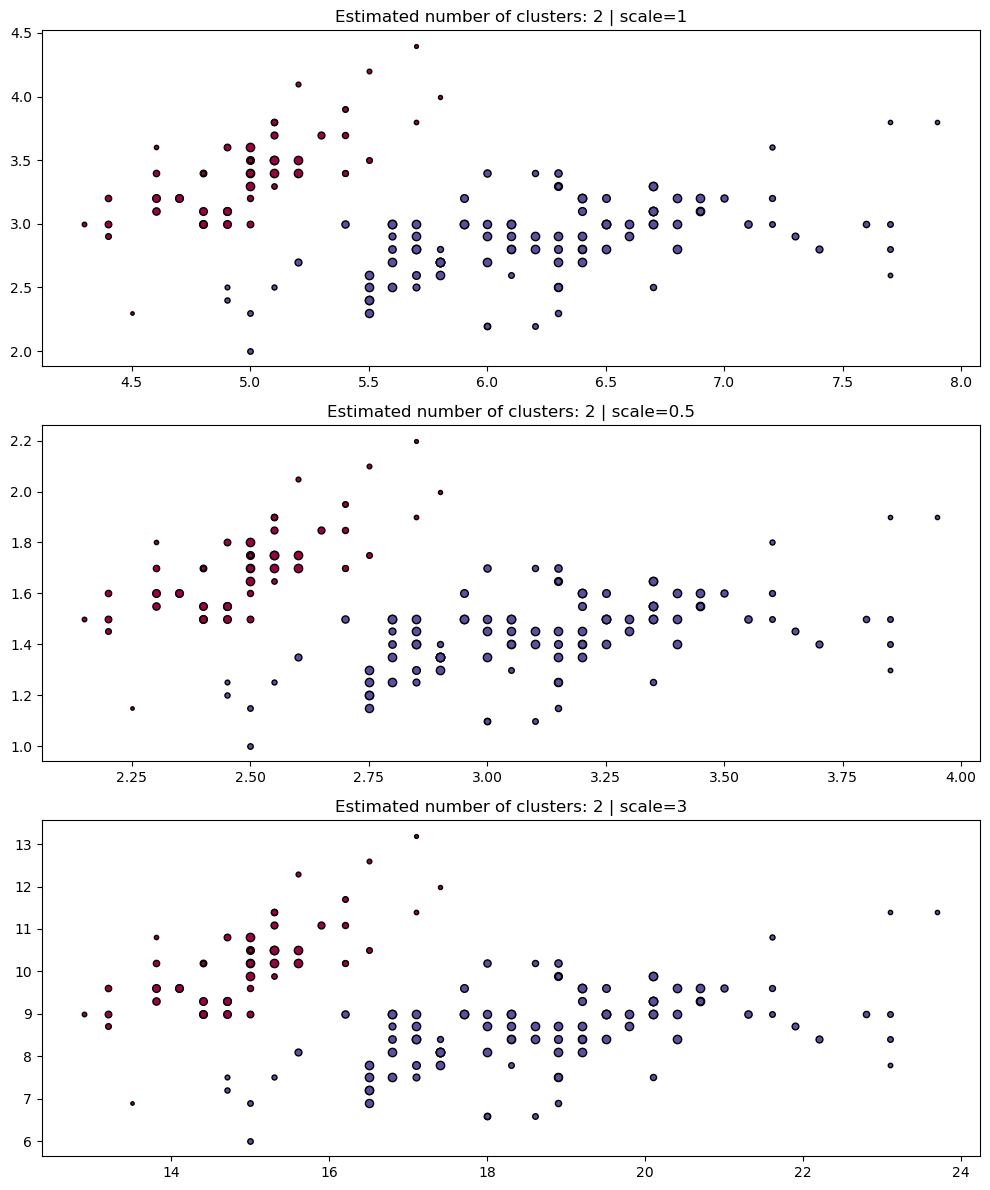

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
hdb = hdbscan.HDBSCAN()
for idx, scale in enumerate([1, 0.5, 3]):
    hdb.fit(X * scale)
    plot(X * scale, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"scale": scale})

## Menghitung Jumlah Noise

In [6]:
labels = hdb.labels_
n_noise = list(labels).count(-1)
print(f"Banyaknya noise (outlier): {n_noise} sampel")

Banyaknya noise (outlier): 0 sampel


## Visualisasi

C:\Users\natha\AppData\Local\Temp\ipykernel_21580\3212328513.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Spectral', n_clusters if n_clusters > 0 else 1)


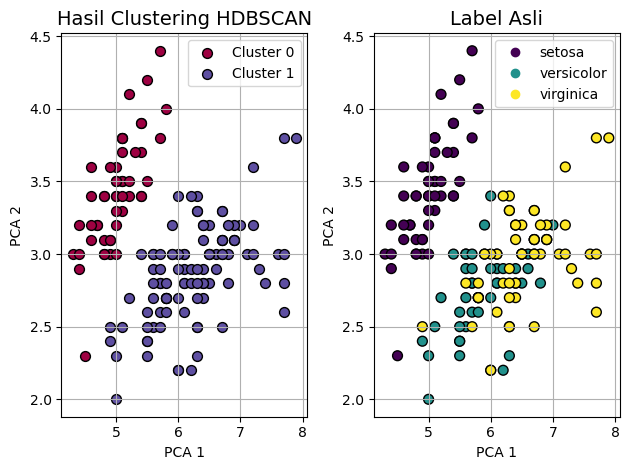

In [8]:
plt.subplot(1, 2, 1)

unique_labels = np.sort(np.unique(labels))

n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
cmap = plt.cm.get_cmap('Spectral', n_clusters if n_clusters > 0 else 1)

cluster_idx = 0
for k in unique_labels:
    if k == -1:
        col = 'black'
        label_text = 'Noise'
    else:
        col = cmap(cluster_idx)
        label_text = f'Cluster {k}'
        cluster_idx += 1

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    
    plt.scatter(xy[:, 0], xy[:, 1], c=[col],
                edgecolor='k', s=50, label=label_text)

plt.title('Hasil Clustering HDBSCAN', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Label Asli', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names))
plt.grid(True)

plt.tight_layout()
plt.show()

## Analisis

Berdasarkan hasil klasterisasi menggunakan HDBSCAN pada dataset Iris:
- Jumlah cluster yang terbentuk: (misalnya 3)
- Jumlah data noise: (misalnya 2)

Hasil klasterisasi cukup sesuai dengan label asli dataset, karena dataset Iris memang terdiri dari 3 jenis bunga (Setosa, Versicolor, Virginica).
HDBSCAN mampu memisahkan sebagian besar data ke dalam 3 kelompok utama, meskipun ada beberapa data dianggap noise karena berada di area perbatasan antar kelas.

Hal ini menunjukkan bahwa HDBSCAN cocok untuk dataset dengan distribusi alami yang tidak selalu terpisah secara tegas. Berbeda dengan K-Means yang memaksa jumlah cluster tetap, HDBSCAN menentukan jumlah cluster berdasarkan kepadatan data.